# Covariance estimation from data sets 

 ## Inspect 2-dimensional data set
 
__Tasks:__ 
 1. Inspect how the 2-dimensional toy data are constructed. 
 2. Visually inspect the data using a scatterplot (plt.scatter(...)) and a histogram (plt.hist(...)). Use different configurations of the covariance and plot them all to the same figure. Therefore, please review the properties of a covariance matrix.

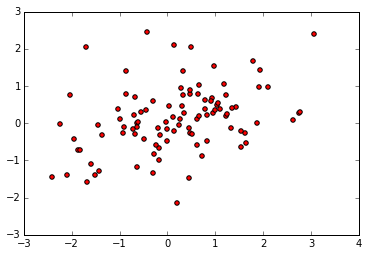

In [82]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Assign the "true" mean and covariance of your toy dataset
#mean = [5, 0, 0]
mean = [0, 0]
# covariance matrix is symmetric. np.random function accepts also non-symmetric, but appearantly corrects the error
#cov = [[1, 3, 0], 
#       [0, 1, 0],
#       [0, 0, 1]]  # diagonal covariance
cov = [[1, 1], 
       [1, 0]]  # diagonal covariance

N_samples = 100
# higher dimensional gaussian distribution, governed by a covariance matrix
X = np.random.multivariate_normal(mean, cov, N_samples)
#print(X)
#print(X[:,0])
#print(X[:,1])

# TO DO: Scatter plot. Try different colors for different covariance matrices (use c=' ' parameter)
plt.scatter(X[:,0], X[:,1], c='r')
plt.show()

#plt.scatter(X[:,0], X[:,2], c='b')
#plt.show()

# TO DO: Histogram in both dimensions
#for i in range(X[1]):
#plt.hist(X, bins=30, color="blue")
plt.hist(X, bins=30)
#    plt.hist(X_train[indices_class2, i], bins=30, color="red")
#    plt.hist(X_train[indices_class3, i], bins=30, color="green")
plt.xlabel(["feature - x", "feature - y"])
plt.grid()
plt.show()


## Covariance estimator for N-dimensional data

The function sample_generator() generates toy data for a given number of samples and features and draws its samples from a D-dimensional normal distribution. 

In [30]:
def sample_generator(N_samples, D_features):
    '''returns N_samples from a p=D_features variate normal distribution
    Input: N_samples, D_features
    Output: data matrix X (size: NxD)
           true covariance matrix true_cov (size: ?x?)'''

    # Construct a positive semi-definite covariance matrix
    # every positive semi - definite matrix is a covariance matrix (and vice versa). Any covariance matrix ist symmetric
    # X dot XT ist immer positiv semidefinit --> xT AAT X = (XT A) (AT X) = (AT X)T (AT X) immer positiv (Summe von Quadraten)
    tmp = np.random.randn(D_features,D_features)
    true_cov = np.dot(tmp,tmp.transpose()) 

    mean = [0]*D_features  
    # get samples from multivariate normal distribution
    X = np.random.multivariate_normal(mean, true_cov, N_samples)
    return X, true_cov


true_cov 
 [[4, 2], [2, 4]]
est_cov 
 [[ 4.03350458  2.02693063]
 [ 2.02693063  4.02954797]]


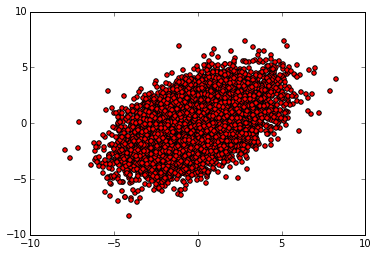

In [119]:
# test cov of several shapes

mean = [0, 0]
true_cov = [[4, 2], 
            [2, 4]]
#true_cov = [[2, 4], 
#            [4, 2]]
         
X = np.random.multivariate_normal(mean, true_cov, 10000)  # 100 samples

est_cov = 1./(len(X)-1)*np.dot(np.transpose(X-mean),(X-mean))

print("true_cov \n", true_cov)
print("est_cov \n", est_cov)

plt.scatter(X[:,0], X[:,1], c='r')
plt.show()
        
# observation: when choosing invalid values for cov, random generator replaces by reasonable values.
# e.g. violation of symmetry, or cross - covariance values xy larger than xx 

__Tasks:__ 
  1. Implement a function estimate_covariance() that calculates the covariance matrix for a given data set $X$ of size $(N_{samples} \times D_{features})$. You can test your function with a data set returned from the function sample_generator(). 
  2. Compare your resulting covariance matrix with the corresponding built-in-function in the "Numpy" package. Please carefully check the documentation of the function for the definition of the input. You can visualize covariance matrices e.g. with the function plt.imshow(...) from the "Matplotlib" package. 


In [29]:
def estimate_covariance(X):
    '''estimate the covariance matrix
    Input: data matrix X (size: NxD) 
    Output: covariance matrix cov (size: DxD)'''
    
    
#    cov = 1/len(X) * np.dot(np.transpose(X),X)
    mean = np.mean(X,0)
    # mean is "broadcasted, as X is 200 * 100 matrix, but mean 1 x 100 vector
    cov = 1./(len(X)-1)*np.dot(np.transpose(X-mean),(X-mean))

#    cov = np.dot(X,np.transpose(X))
    
    
    
    return cov

D_features = 100
N_samples = 200
X, true_cov = sample_generator(N_samples, D_features)

#print("true_cov {}, shape {}".format(true_cov,true_cov.shape))


# estimate covariance using your implementation
cov = estimate_covariance(X)
print("cov.shape", cov.shape)

#print("cov {}, shape {}".format(cov,cov.shape))

# for comparison: estimate covariance using the numpy-function 

np_cov = np.cov(np.transpose(X))

#print("np_cov {}, shape {}".format(np_cov,np_cov.shape))

# plot the covariance matrix 
plt.imshow(cov)

cov.shape (100, 100)


## Bonus: Visualizing the eigenvectors of the covariance matrix

In this (optional) task, we want to shed light on the relationship between the eigenvalues / eigenvectors of the covariance matrix and the shape of the normal distribution in a 2D scenario. 

__Tasks__: 1.) Visualize a randomly sampled normal distribution (e.g. by using the seaborn function sns.jointplot()). The seaborn package is a matplotlib-based visualization package. You can install it by typing the following command in the terminal: __"sudo pip3 install seaborn"__. If you run the script and you do not see the data, also install the cairo backend with __"sudo pip3 install cairocffi"__.)

2.) Calculate eigenvalues and eigenvectors of the true covariance matrix.

3.) Draw the estimated eigenvectors multiplied by the square root of the corresponding eigenvalues in the same plot.

#### Q2.2.1 (Bonus) What do you observe regarding the size of the eigenvalues and the shape of the covariance matrix?

#### Q2.2.2 (Bonus) If the eigenvalues are over -  or underestimated, what does this mean for the estimated shape of the normal distribution?

eig_w  [ 0.12360891  1.03790278]
eig_v ursprünglich 
 [[-0.78377182 -0.6210489 ]
 [ 0.6210489  -0.78377182]]


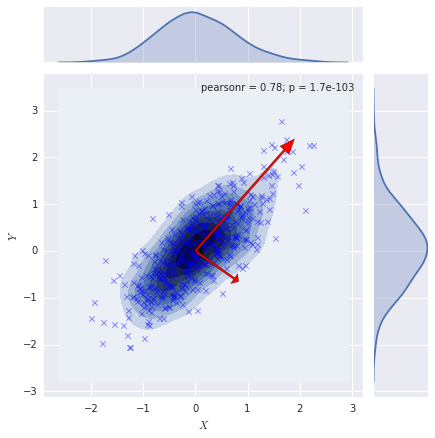

In [13]:
import seaborn as sns
from numpy import linalg as LA
np.random.seed(1235)
D_features = 2
N_samples = 500
X, true_cov = sample_generator(N_samples, D_features)

s = sns.jointplot(X[:,0],X[:,1],kind="kde");
s.plot_joint(plt.scatter, c="b", s=30, linewidth=1, alpha=0.43, marker="x")
s.set_axis_labels("$X$", "$Y$");
eig_w, eig_v = np.linalg.eig(true_cov)
print("eig_w ", eig_w)
print("eig_v ursprünglich \n", eig_v)

for index, eigenwert in enumerate(eig_w):
    start = (0,0)
    s.ax_joint.annotate(      # annotateinfo in graph plus vectors https://seaborn.pydata.org/generated/seaborn.JointGrid.html
        '', xy=eig_v[:,index]*np.sqrt(eigenwert)*-3, xycoords='data',
        xytext=start, textcoords='data',
        arrowprops=dict(facecolor='red', width=2.0))
sns.plt.show();



## Eigenvalue Spectrum for various sample sizes

__Tasks:__ For a fixed number of features $D_{features} = 100$, vary the number of samples $N_{samples}$ and implement the following steps:
 1. Estimate the covariance matrix from the generated samples X
 2. Calculate the eigenvalues of the covariance
 3. Sort the eigenvalues in descending order
 4. Plot the eigenvalues as a function of their order/rank (called eigenvalue spectrum)

This procedure should be repeated for the given sample sizes $N_{samples}=[20,50,100,300,1000]$ and all eigenvalue spectra shown in one figure. For comparison, repeat the steps (2)-(4) also for the true covariance matrix and add this eigenvalue spectrum to the created figure. Here is an example obtained for a given ground truth covariance matrix and one calculated using 120 samples from the same distribution

![title](data/eigenvalue_spectrum.png)

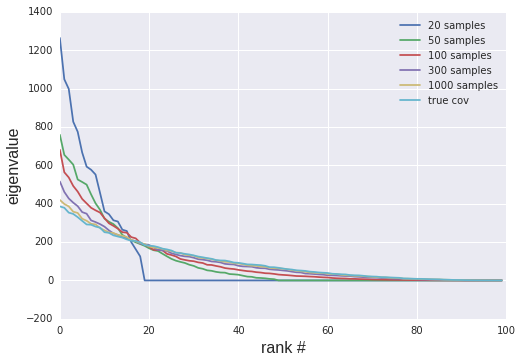

In [22]:
D_features = 100
N_samples = [20,50,100,300,1000]

# generate random covariance matrix
tmp = np.random.randn(D_features,D_features)  # also eine zufällig zusammengewürfelte 100 x 100 matrix
true_cov = np.dot(tmp,tmp.transpose()) 

plt.figure()

for index, N_samples in enumerate(N_samples):
    
    # generate data set with N_samples
    # X, true_cov = sample_generator(N_samples, D_features)

    mean = [0]*D_features
    # get samples from multivariate normal distribution
    X = np.random.multivariate_normal(mean, true_cov, N_samples)     
    
    
    # estimate covariance from the data X 
    mean = np.mean(X,0)
    #cov = 1./(len(X)-1)*np.dot(np.transpose(X-mean),(X-mean))
    cov = np.cov(np.transpose(X))
    # calculate eigenvectors of estimated covariance 
    emp_w, emp_v = np.linalg.eig(cov)
    
    # plot the eigenvalue-spectrum for each sample configuration
    
    plt.plot(sorted(np.real(emp_w), reverse=True), label='%s samples' % N_samples) 
    
# Calculate and plot eigenvalue spectrum of true covariance matrix
    
true_w, true_v = np.linalg.eig(true_cov)

plt.plot(sorted(true_w, reverse=True), label='true cov')
plt.xlabel('rank #', fontsize=16)
plt.ylabel('eigenvalue', fontsize=16)
#plt.ylim(0,250)
plt.legend()
plt.show()


#### Q2.2.3) What do you observe for the largest and smallest estimates of the eigenvalues?
Number of Eigenvalues is at most the number of features, but not more than the number of samples
Few samples lead to more noisy data, and thus higher Eigenvalues (more variance).
Large number of samples the Eigenvalue spectrum is approx. the spectrum of true cov. 
#### Q2.2.4) What do you observe for an increasing number of N_samples?

#### Q2.2.5) Which condition for the N_samples in relation to D_features is necessary to allow a training of the LDA?
N_samples larger than D-Features

#### Q2.2.6) How can you manipulate your DATA to avoid this problem, in case of N_samples < D_features?
generating more data


## Bonus:  Improving covariance estimation by means of regularization
You may have observed a systematic error in the eigenvalues estimates, even for N_samples > D_features. 

__Task:__ Investigate a way to compensate for this systematic error such that the estimated spectrum approximates the true spectrum more closely. __Hint:__ Regularized estimation of covariance matrix

#### Q2.2.7) (Bonus) Upload to the wiki (under wiki/Results Assignment 2/Q 2.2.7) the mean squared error between your solution and the true eigenvalue spectrum. Commit the code for your solution (jupyter notebook) to git_dir/Assignment2/Q2-2.ipynb

In [25]:
from sklearn.covariance import shrunk_covariance

def mean_squared_error(y_pred, y_true):
    ''' returns the mean squared error 
    Input:estimated eigenvalue spectrum y_pred of size D 
          true eigenvalue spectrum y_true of size D
    Output: mean squared error ms_error'''
    
    y_true = np.sort(np.real(y_true))
    y_pred = np.sort(np.real(y_pred))
    ms_error = np.linalg.norm(y_pred-y_true)
    
    return ms_error

def regularized_covariance(X):
    # !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! #
    # Implement here your improved estimation of the covariance matrix #
    # !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! #
    improved_cov = np.cov(X.T)
    
    shrink_param = 0.3
    #http://scikit-learn.org/stable/modules/covariance.html#shrunk-covariance
    
    improved_cov = shrunk_covariance(improved_cov,shrink_param)
    
    return improved_cov

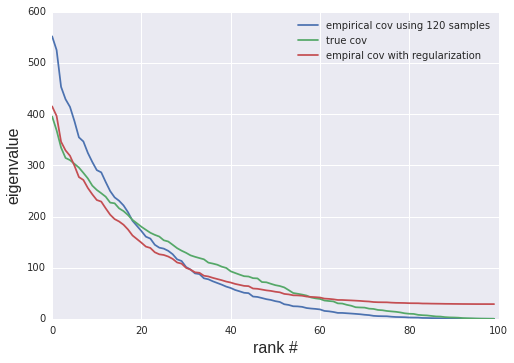

The mean squared error vs no regularized is 385.0
The mean squared error vs regularized is 218.4


In [27]:
# this seed ensures comparable results when repeating the calculation. Please keep this unchanged!!!
np.random.seed(1337)

# please keep this N_samples unchanged!
N_samples = 120
X, true_cov = sample_generator(N_samples, D_features)

# true eigenvalue spectrum (sorted)
true_w, true_v = np.linalg.eig(true_cov)
true_w = np.array(sorted(true_w, reverse=True))

# calculate eigenvectors of estimated covariance 
emp_cov = np.cov(X.T)
emp_w, emp_v = np.linalg.eig(emp_cov)
emp_w = np.array(sorted(np.real(emp_w), reverse=True))

# Your approach
improved_cov = regularized_covariance(X)
improved_w, emp_v = np.linalg.eig(improved_cov)
improved_w = np.array(sorted(np.real(improved_w), reverse=True))


plt.figure()
plt.plot(emp_w, label='empirical cov using %s samples' % N_samples)
plt.plot(true_w, label='true cov')
plt.plot(improved_w, label='empiral cov with regularization')
plt.xlabel('rank #', fontsize=16)
plt.ylabel('eigenvalue', fontsize=16)
plt.xlim(0,100)
plt.legend()
plt.show()

# report on the mean squared error between true covariance and your covariance estimation
# as a baseline, you need to improve upon the mean squared error between emp_w and true_w
error = mean_squared_error(emp_w,true_w)
print('The mean squared error vs no regularized is %.1f' %error)

error = mean_squared_error(improved_w,true_w)
print('The mean squared error vs regularized is %.1f' %error)